In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Especifica la ruta al archivo CSV
path = r'C:\\Users\\joset\\OneDrive\\Documentos\\Master Big Data UCM\\18-TFN\NaturgyProject\\data'
# Lee el archivo CSV en un DataFrame de pandas
Emisión_y_Repartos_original = pd.read_csv(path + '\\Originales\\Emisión_y_Repartos.csv', encoding = 'latin1')


C:\Users\joset\AppData\Local\Temp\ipykernel_18008\438002784.py:4: DtypeWarning: Columns (5,6,7,8,12) have mixed types. Specify dtype option on import or set low_memory=False.
  Emisión_y_Repartos_original = pd.read_csv(path + '\\Originales\\Emisión_y_Repartos.csv', encoding = 'latin1')


In [3]:
Emisión_y_Repartos = Emisión_y_Repartos_original.copy()

In [4]:
Emisión_y_Repartos.head(3)

,comer,Punto,fecha_gas,Reparto_N1,Telemedida_N1,No_Telemedido_T1_34_N1,No_Telemedido_T1_No34_N1,No_Telemedido_T2_N1,Mermas_N1,Residuo_N1,...,No_Telemedido_T2_M3,Mermas_M3,Residuo_M3,Reparto_M15,Telemedida_M15,No_Telemedido_T1_34_M15,No_Telemedido_T1_No34_M15,No_Telemedido_T2_M15,Mermas_M15,Residuo_M15
0,762,10,25/12/2022,7,0.0,0,0,8,0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,762,15.02,25/12/2022,6,0.0,0,0,8,0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,762,15.09,25/12/2022,4,0.0,0,0,41,0,-37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def convertir_numero(valor):
    # Verificar si el valor es NaN, en cuyo caso lo ignoramos
    if pd.isna(valor):
        return valor
    # Si es un número (int o float), lo devolvemos tal cual
    if isinstance(valor, (int, float)):
        return valor    
    # Si es una cadena, procesamos el texto
    if isinstance(valor, str) and ',' in valor:
        partes = valor.split(',')
        if len(partes[-1]) < 3:
        # Si la última parte tiene menos de 3 dígitos, interpretarlo como decimal
            valor = ''.join(partes[:-1]) + partes[-1].ljust(3, '0')
        else:
            # Si no, es un separador de miles, eliminar comas
            valor = ''.join(partes)    
    return int(valor)

In [6]:
columnas_a_procesar = ['No_Telemedido_T1_34_N1',
                       'No_Telemedido_T1_No34_N1',	
                       'No_Telemedido_T2_N1',
                       'No_Telemedido_T1_34_M3',
                       'No_Telemedido_T2_M3',
                       'Residuo_M3']

In [7]:
Emisión_y_Repartos[columnas_a_procesar] = Emisión_y_Repartos[columnas_a_procesar].applymap(convertir_numero)

C:\Users\joset\AppData\Local\Temp\ipykernel_18008\1142883282.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Emisión_y_Repartos[columnas_a_procesar] = Emisión_y_Repartos[columnas_a_procesar].applymap(convertir_numero)


In [8]:
# Convertir las columnas a formato numérico y reemplazar valores no convertibles por cero
columnas_a_convertir = [
    'Telemedida_N1',
    'No_Telemedido_T1_34_N1',
    'No_Telemedido_T1_No34_N1',
    'No_Telemedido_T2_N1',
    'Mermas_N1',
    'Residuo_N1'
]

# Reemplazar valores no convertibles por NaN y luego los NaN por 0
Emisión_y_Repartos[columnas_a_convertir] = Emisión_y_Repartos[columnas_a_convertir].apply(pd.to_numeric, errors='coerce').fillna(0)

In [9]:
#Recalculamos los valores de N1,M3 y M15
Emisión_y_Repartos['Reparto_N1'] = (
    Emisión_y_Repartos['Telemedida_N1'] +
    Emisión_y_Repartos['No_Telemedido_T1_34_N1'] +
    Emisión_y_Repartos['No_Telemedido_T1_No34_N1'] +
    Emisión_y_Repartos['No_Telemedido_T2_N1'] +
    Emisión_y_Repartos['Mermas_N1'] +
    Emisión_y_Repartos['Residuo_N1']
)

Emisión_y_Repartos['Reparto_M3'] = (
    Emisión_y_Repartos['Telemedida_M3'] +
    Emisión_y_Repartos['No_Telemedido_T1_34_M3'] +
    Emisión_y_Repartos['No_Telemedido_T1_No34_M3'] +
    Emisión_y_Repartos['No_Telemedido_T2_M3'] +
    Emisión_y_Repartos['Mermas_M3'] +
    Emisión_y_Repartos['Residuo_M3']
)
Emisión_y_Repartos['Reparto_M15'] = (
    Emisión_y_Repartos['Telemedida_M15'] +
    Emisión_y_Repartos['No_Telemedido_T1_34_M15'] +
    Emisión_y_Repartos['No_Telemedido_T1_No34_M15'] +
    Emisión_y_Repartos['No_Telemedido_T2_M15'] +
    Emisión_y_Repartos['Mermas_M15'] +
    Emisión_y_Repartos['Residuo_M15']
)
# Si el valor de 'Reparto_N1' es negativo, reemplazarlo con 0
Emisión_y_Repartos['Reparto_N1'] = Emisión_y_Repartos['Reparto_N1'].apply(lambda x: max(x, 0))
Emisión_y_Repartos['Reparto_M3'] = Emisión_y_Repartos['Reparto_M3'].apply(lambda x: max(x, 0))
Emisión_y_Repartos['Reparto_M15'] = Emisión_y_Repartos['Reparto_M3'].apply(lambda x: max(x, 0))

In [10]:
Emisión_y_Repartos.head(10)

,comer,Punto,fecha_gas,Reparto_N1,Telemedida_N1,No_Telemedido_T1_34_N1,No_Telemedido_T1_No34_N1,No_Telemedido_T2_N1,Mermas_N1,Residuo_N1,...,No_Telemedido_T2_M3,Mermas_M3,Residuo_M3,Reparto_M15,Telemedida_M15,No_Telemedido_T1_34_M15,No_Telemedido_T1_No34_M15,No_Telemedido_T2_M15,Mermas_M15,Residuo_M15
0,762,10,25/12/2022,7.0,0.0,0.0,0.0,8.0,0.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,762,15.02,25/12/2022,6.0,0.0,0.0,0.0,8.0,0.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,762,15.09,25/12/2022,4.0,0.0,0.0,0.0,41.0,0.0,-37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,762,15.10.01,25/12/2022,25.0,0.0,0.0,0.0,31.0,0.0,-6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,762,15.11-01,25/12/2022,4.0,0.0,0.0,0.0,5.0,0.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,762,15.14,25/12/2022,51.0,0.0,0.0,0.0,77.0,1.0,-27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,762,15.15A,25/12/2022,39.0,0.0,0.0,0.0,31.0,0.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,762,15.17-01,25/12/2022,4.0,0.0,0.0,0.0,5.0,0.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,762,15.19,25/12/2022,5.0,0.0,0.0,0.0,5.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,762,15.20.5EGT,25/12/2022,2.0,0.0,0.0,0.0,5.0,0.0,-3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Seleccionar las columnas necesarias
Emisión_y_Repartos_reducido = Emisión_y_Repartos[['comer', 'Punto', 'fecha_gas', 'Reparto_N1', 'Reparto_M3', 'Reparto_M15']].copy()
Emisión_y_Repartos_reducido['fecha_gas'] = pd.to_datetime(Emisión_y_Repartos_reducido['fecha_gas'])
Emisión_y_Repartos_reducido.head(3)

C:\Users\joset\AppData\Local\Temp\ipykernel_18008\2421012225.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Emisión_y_Repartos_reducido['fecha_gas'] = pd.to_datetime(Emisión_y_Repartos_reducido['fecha_gas'])


,comer,Punto,fecha_gas,Reparto_N1,Reparto_M3,Reparto_M15
0,762,10,2022-12-25,7.0,NaN,NaN
1,762,15.02,2022-12-25,6.0,NaN,NaN
2,762,15.09,2022-12-25,4.0,NaN,NaN


In [12]:
# Mapping corregido con claves numéricas
mapping = {33: 'GNS', 52: 'SUR', 762: 'NC'}
# Aplicar el mapeo para crear la nueva columna 'Comercializador'
Emisión_y_Repartos_reducido['Comercializador'] = Emisión_y_Repartos_reducido['comer'].map(mapping)
# Obtener el orden actual de las columnas
columnas = Emisión_y_Repartos_reducido.columns.tolist()
# Reubicar la columna 'Comercializador' después de 'comer'
columnas.insert(columnas.index('comer') + 1, columnas.pop(columnas.index('Comercializador')))
# Reordenar las columnas en el DataFrame
Emisión_y_Repartos_reducido = Emisión_y_Repartos_reducido[columnas]
# Verificar el resultado
Emisión_y_Repartos_reducido.head(3)

,comer,Comercializador,Punto,fecha_gas,Reparto_N1,Reparto_M3,Reparto_M15
0,762,NC,10,2022-12-25,7.0,NaN,NaN
1,762,NC,15.02,2022-12-25,6.0,NaN,NaN
2,762,NC,15.09,2022-12-25,4.0,NaN,NaN


In [13]:
#Guardamos nuestro Dataset
Emisión_y_Repartos_reducido.to_csv(path + '\\Cleaning\\Emisión_y_Repartos_reducido.csv', index=False)

In [14]:
Emisión_y_Repartos_Reparto_N1= Emisión_y_Repartos_reducido[['comer', 'Comercializador','Punto', 'fecha_gas', 'Reparto_N1']].copy()
Emisión_y_Repartos_Reparto_N1_NC=Emisión_y_Repartos_Reparto_N1[Emisión_y_Repartos_Reparto_N1['Comercializador'] == 'NC']
Emisión_y_Repartos_Reparto_N1_NC['fecha_gas'] = pd.to_datetime(Emisión_y_Repartos_Reparto_N1_NC['fecha_gas'], format='%d/%m/%Y')
Emisión_y_Repartos_Reparto_N1_NC= Emisión_y_Repartos_Reparto_N1_NC.groupby('fecha_gas')['Reparto_N1'].sum().reset_index()
Emisión_y_Repartos_Reparto_N1_NC= Emisión_y_Repartos_Reparto_N1_NC.sort_values(by='fecha_gas')
Emisión_y_Repartos_Reparto_N1_NC.head(3)

C:\Users\joset\AppData\Local\Temp\ipykernel_18008\303456421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Emisión_y_Repartos_Reparto_N1_NC['fecha_gas'] = pd.to_datetime(Emisión_y_Repartos_Reparto_N1_NC['fecha_gas'], format='%d/%m/%Y')


,fecha_gas,Reparto_N1
0,2022-04-20,10.0
1,2022-04-21,11.0
2,2022-04-22,10.0


In [15]:
Emisión_y_Repartos_Reparto_N1_NC.describe()

,fecha_gas,Reparto_N1
count,785,785.000000
mean,2023-05-16 23:59:59.999999744,11567.635669
min,2022-04-20 00:00:00,10.000000
25%,2022-11-02 00:00:00,1220.000000
50%,2023-05-17 00:00:00,3256.000000
75%,2023-11-29 00:00:00,20428.000000
max,2024-06-12 00:00:00,56232.000000
std,NaN,15030.579139


In [16]:
#Guardamos nuestro Dataset
Emisión_y_Repartos_Reparto_N1_NC.to_csv(path + '\\Cleaning\\Emisión_y_Repartos_Reparto_N1_NC.csv', index=False)

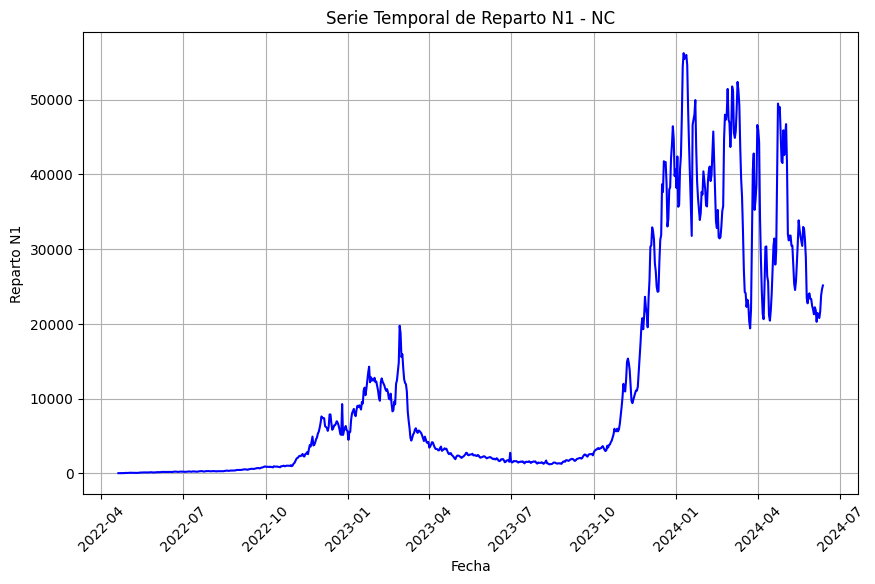

In [17]:
# Crear el gráfico de línea para la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(Emisión_y_Repartos_Reparto_N1_NC['fecha_gas'], Emisión_y_Repartos_Reparto_N1_NC['Reparto_N1'], linestyle='-', color='blue')

# Etiquetas y título del gráfico
plt.xlabel('Fecha')
plt.ylabel('Reparto N1')
plt.title('Serie Temporal de Reparto N1 - NC')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar la cuadrícula para facilitar la lectura
plt.grid(True)

# Mostrar el gráfico
plt.show()



In [18]:
Emisión_y_Repartos_Reparto_N1_SUR=Emisión_y_Repartos_Reparto_N1[Emisión_y_Repartos_Reparto_N1['Comercializador'] == 'SUR']
Emisión_y_Repartos_Reparto_N1_SUR['fecha_gas'] = pd.to_datetime(Emisión_y_Repartos_Reparto_N1_SUR['fecha_gas'], format='%d/%m/%Y')
Emisión_y_Repartos_Reparto_N1_SUR= Emisión_y_Repartos_Reparto_N1_SUR.groupby('fecha_gas')['Reparto_N1'].sum().reset_index()
Emisión_y_Repartos_Reparto_N1_SUR=Emisión_y_Repartos_Reparto_N1_SUR.sort_values(by='fecha_gas')
Emisión_y_Repartos_Reparto_N1_SUR.head(3)

C:\Users\joset\AppData\Local\Temp\ipykernel_18008\330443872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Emisión_y_Repartos_Reparto_N1_SUR['fecha_gas'] = pd.to_datetime(Emisión_y_Repartos_Reparto_N1_SUR['fecha_gas'], format='%d/%m/%Y')


,fecha_gas,Reparto_N1
0,2013-10-01,82762.0
1,2013-10-02,117256.0
2,2013-10-03,78212.0


In [19]:
Emisión_y_Repartos_Reparto_N1_SUR.describe()

,fecha_gas,Reparto_N1
count,3908,3.908000e+03
mean,2019-02-05 12:00:00,1.358152e+07
min,2013-10-01 00:00:00,1.763000e+03
25%,2016-06-03 18:00:00,3.457864e+06
50%,2019-02-05 12:00:00,6.652652e+06
75%,2021-10-09 06:00:00,2.360285e+07
max,2024-06-12 00:00:00,6.859230e+07
std,NaN,1.462249e+07


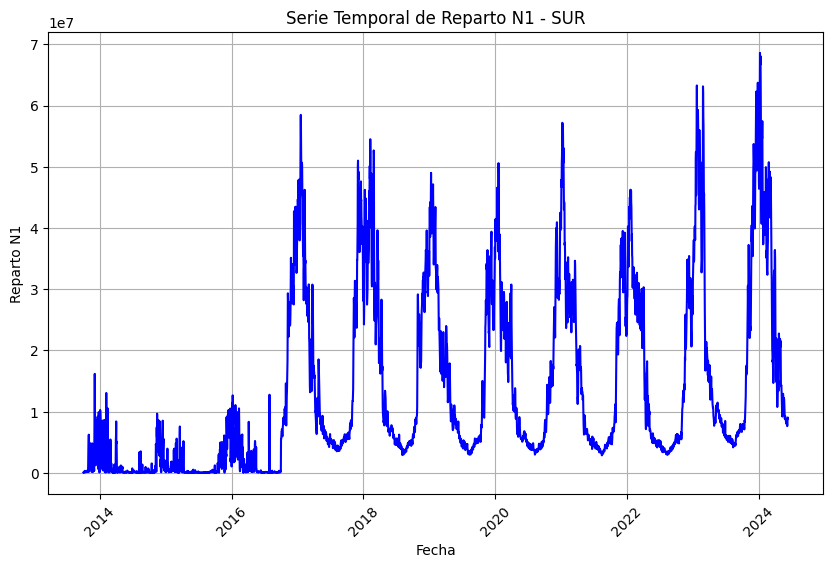

In [20]:
# Crear el gráfico de línea para la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(Emisión_y_Repartos_Reparto_N1_SUR['fecha_gas'], Emisión_y_Repartos_Reparto_N1_SUR['Reparto_N1'], linestyle='-', color='blue')

# Etiquetas y título del gráfico
plt.xlabel('Fecha')
plt.ylabel('Reparto N1')
plt.title('Serie Temporal de Reparto N1 - SUR')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar la cuadrícula para facilitar la lectura
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [21]:
Emisión_y_Repartos_Reparto_N1_GNS=Emisión_y_Repartos_Reparto_N1[Emisión_y_Repartos_Reparto_N1['Comercializador'] == 'GNS']
Emisión_y_Repartos_Reparto_N1_GNS['fecha_gas'] = pd.to_datetime(Emisión_y_Repartos_Reparto_N1_SUR['fecha_gas'], format='%d/%m/%Y')
Emisión_y_Repartos_Reparto_N1_GNS= Emisión_y_Repartos_Reparto_N1_GNS.groupby('fecha_gas')['Reparto_N1'].sum().reset_index()
Emisión_y_Repartos_Reparto_N1_GNS=Emisión_y_Repartos_Reparto_N1_GNS.sort_values(by='fecha_gas')
Emisión_y_Repartos_Reparto_N1_GNS.head(3)

C:\Users\joset\AppData\Local\Temp\ipykernel_18008\1174000325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Emisión_y_Repartos_Reparto_N1_GNS['fecha_gas'] = pd.to_datetime(Emisión_y_Repartos_Reparto_N1_SUR['fecha_gas'], format='%d/%m/%Y')


,fecha_gas,Reparto_N1
0,2014-07-28,11493.0
1,2014-07-29,9966.0
2,2014-07-30,12256.0


In [22]:
Emisión_y_Repartos_Reparto_N1_GNS.describe()

,fecha_gas,Reparto_N1
count,2568,2568.000000
mean,2019-04-02 14:37:34.205607424,6019.051012
min,2014-07-28 00:00:00,0.000000
25%,2017-10-14 18:00:00,2147.000000
50%,2019-07-18 12:00:00,4930.500000
75%,2021-04-20 06:00:00,9206.000000
max,2023-01-22 00:00:00,23366.000000
std,NaN,4490.228415


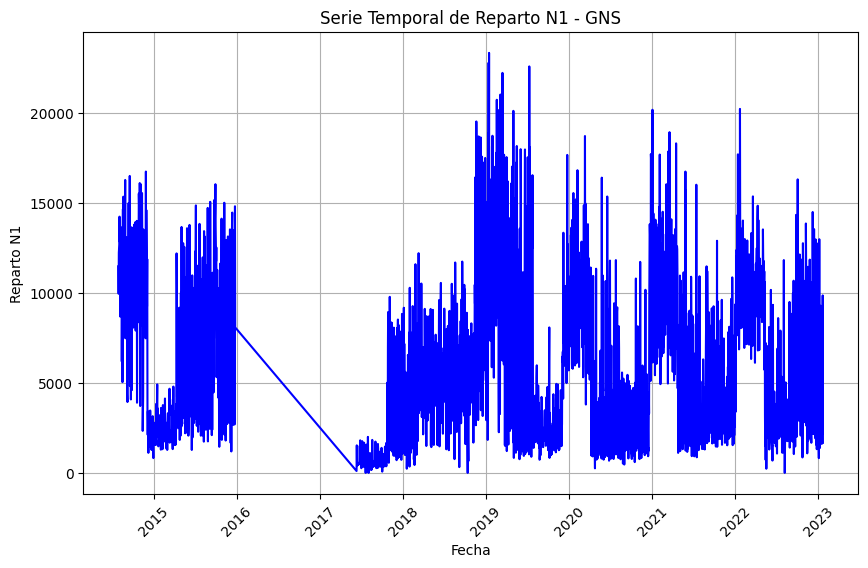

In [23]:
# Crear el gráfico de línea para la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(Emisión_y_Repartos_Reparto_N1_GNS['fecha_gas'], Emisión_y_Repartos_Reparto_N1_GNS['Reparto_N1'], linestyle='-', color='blue')

# Etiquetas y título del gráfico
plt.xlabel('Fecha')
plt.ylabel('Reparto N1')
plt.title('Serie Temporal de Reparto N1 - GNS')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar la cuadrícula para facilitar la lectura
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [24]:
Emisión_y_Repartos_Reparto_N1_total = Emisión_y_Repartos_Reparto_N1[['fecha_gas', 'Reparto_N1']].copy()
Emisión_y_Repartos_Reparto_N1_total = Emisión_y_Repartos_Reparto_N1_total.groupby('fecha_gas')['Reparto_N1'].sum().reset_index()
Emisión_y_Repartos_Reparto_N1_total['fecha_gas'] = pd.to_datetime(Emisión_y_Repartos_Reparto_N1_total['fecha_gas'], format='%d/%m/%Y')
Emisión_y_Repartos_Reparto_N1_total = Emisión_y_Repartos_Reparto_N1_total.sort_values(by='fecha_gas')
Emisión_y_Repartos_Reparto_N1_total.head(3)

,fecha_gas,Reparto_N1
0,2013-10-01,439973.0
1,2013-10-02,569420.0
2,2013-10-03,434948.0


In [25]:
Emisión_y_Repartos_Reparto_N1_total.describe()

,fecha_gas,Reparto_N1
count,3908,3.908000e+03
mean,2019-02-05 12:00:00,4.904596e+07
min,2013-10-01 00:00:00,3.583600e+04
25%,2016-06-03 18:00:00,1.263565e+07
50%,2019-02-05 12:00:00,2.352803e+07
75%,2021-10-09 06:00:00,8.697161e+07
max,2024-06-12 00:00:00,2.408835e+08
std,NaN,5.257291e+07


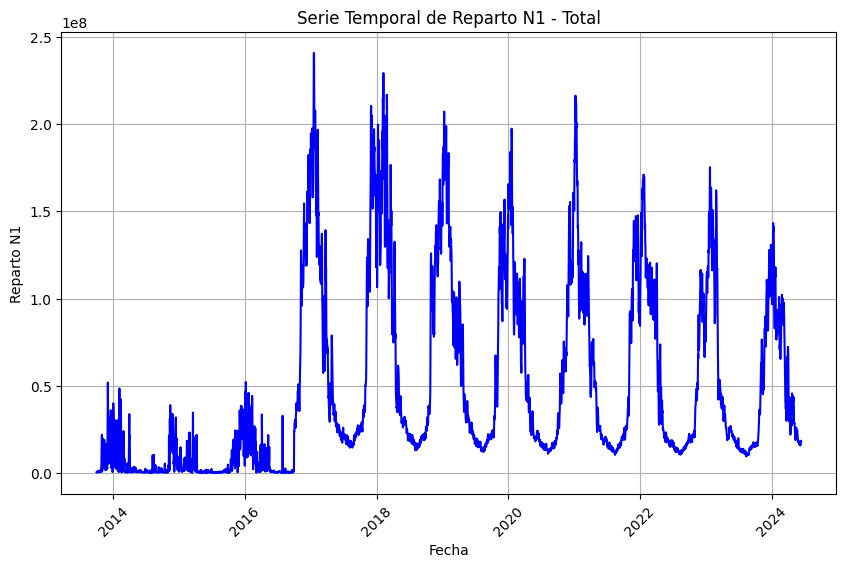

In [26]:
# Crear el gráfico de línea para la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(Emisión_y_Repartos_Reparto_N1_total['fecha_gas'], Emisión_y_Repartos_Reparto_N1_total['Reparto_N1'], linestyle='-', color='blue')

# Etiquetas y título del gráfico
plt.xlabel('Fecha')
plt.ylabel('Reparto N1')
plt.title('Serie Temporal de Reparto N1 - Total')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar la cuadrícula para facilitar la lectura
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [27]:
Emisión_y_Repartos_Reparto_M3= Emisión_y_Repartos_reducido[['comer', 'Comercializador','Punto', 'fecha_gas', 'Reparto_M3']].copy()
Emisión_y_Repartos_Reparto_M3_NC=Emisión_y_Repartos_Reparto_M3[Emisión_y_Repartos_Reparto_M3['Comercializador'] == 'NC']
Emisión_y_Repartos_Reparto_M3_NC['fecha_gas'] = pd.to_datetime(Emisión_y_Repartos_Reparto_M3_NC['fecha_gas'], format='%d/%m/%Y')
Emisión_y_Repartos_Reparto_M3_NC= Emisión_y_Repartos_Reparto_M3_NC.groupby('fecha_gas')['Reparto_M3'].sum().reset_index()
Emisión_y_Repartos_Reparto_M3_NC= Emisión_y_Repartos_Reparto_M3_NC.sort_values(by='fecha_gas')
Emisión_y_Repartos_Reparto_M3_NC = Emisión_y_Repartos_Reparto_M3_NC[Emisión_y_Repartos_Reparto_M3_NC['Reparto_M3'] != 0]
Emisión_y_Repartos_Reparto_M3_NC.head(3)

C:\Users\joset\AppData\Local\Temp\ipykernel_18008\2129504366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Emisión_y_Repartos_Reparto_M3_NC['fecha_gas'] = pd.to_datetime(Emisión_y_Repartos_Reparto_M3_NC['fecha_gas'], format='%d/%m/%Y')


,fecha_gas,Reparto_M3


In [28]:
Emisión_y_Repartos_Reparto_M3= Emisión_y_Repartos_reducido[['comer', 'Comercializador','Punto', 'fecha_gas', 'Reparto_M3']].copy()
Emisión_y_Repartos_Reparto_M3_SUR=Emisión_y_Repartos_Reparto_M3[Emisión_y_Repartos_Reparto_M3['Comercializador'] == 'SUR']
Emisión_y_Repartos_Reparto_M3_SUR['fecha_gas'] = pd.to_datetime(Emisión_y_Repartos_Reparto_M3_SUR['fecha_gas'], format='%d/%m/%Y')
Emisión_y_Repartos_Reparto_M3_SUR= Emisión_y_Repartos_Reparto_M3_SUR.groupby('fecha_gas')['Reparto_M3'].sum().reset_index()
Emisión_y_Repartos_Reparto_M3_SUR= Emisión_y_Repartos_Reparto_M3_SUR.sort_values(by='fecha_gas')
Emisión_y_Repartos_Reparto_M3_SUR = Emisión_y_Repartos_Reparto_M3_SUR[Emisión_y_Repartos_Reparto_M3_SUR['Reparto_M3'] != 0]
Emisión_y_Repartos_Reparto_M3_SUR.head(3)

C:\Users\joset\AppData\Local\Temp\ipykernel_18008\823218156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Emisión_y_Repartos_Reparto_M3_SUR['fecha_gas'] = pd.to_datetime(Emisión_y_Repartos_Reparto_M3_SUR['fecha_gas'], format='%d/%m/%Y')


,fecha_gas,Reparto_M3
396,2014-11-01,1620.0
426,2014-12-01,136807.0
457,2015-01-01,11186.0


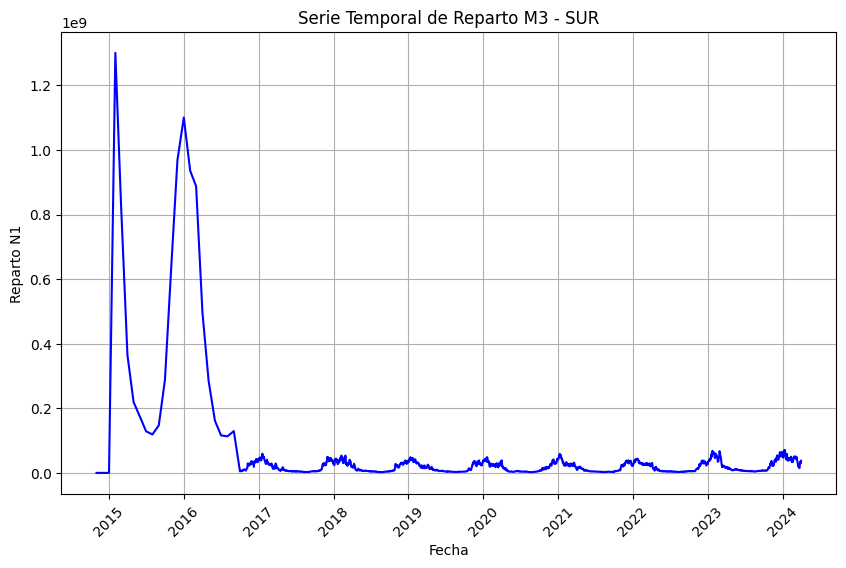

In [29]:
# Crear el gráfico de línea para la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(Emisión_y_Repartos_Reparto_M3_SUR['fecha_gas'], Emisión_y_Repartos_Reparto_M3_SUR['Reparto_M3'], linestyle='-', color='blue')

# Etiquetas y título del gráfico
plt.xlabel('Fecha')
plt.ylabel('Reparto N1')
plt.title('Serie Temporal de Reparto M3 - SUR')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar la cuadrícula para facilitar la lectura
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [30]:
Emisión_y_Repartos_Reparto_M3= Emisión_y_Repartos_reducido[['comer', 'Comercializador','Punto', 'fecha_gas', 'Reparto_M3']].copy()
Emisión_y_Repartos_Reparto_M3_GNC=Emisión_y_Repartos_Reparto_M3[Emisión_y_Repartos_Reparto_M3['Comercializador'] == 'GNC']
Emisión_y_Repartos_Reparto_M3_GNC['fecha_gas'] = pd.to_datetime(Emisión_y_Repartos_Reparto_M3_GNC['fecha_gas'], format='%d/%m/%Y')
Emisión_y_Repartos_Reparto_M3_GNC= Emisión_y_Repartos_Reparto_M3_GNC.groupby('fecha_gas')['Reparto_M3'].sum().reset_index()
Emisión_y_Repartos_Reparto_M3_GNC= Emisión_y_Repartos_Reparto_M3_GNC.sort_values(by='fecha_gas')
Emisión_y_Repartos_Reparto_M3_GNC = Emisión_y_Repartos_Reparto_M3_GNC[Emisión_y_Repartos_Reparto_M3_GNC['Reparto_M3'] != 0]
Emisión_y_Repartos_Reparto_M3_GNC.head(3)

,fecha_gas,Reparto_M3


In [31]:
Emisión_y_Repartos_Reparto_M15= Emisión_y_Repartos_reducido[['comer', 'Comercializador','Punto', 'fecha_gas', 'Reparto_M15']].copy()
Emisión_y_Repartos_Reparto_M15_NC=Emisión_y_Repartos_Reparto_M15[Emisión_y_Repartos_Reparto_M15['Comercializador'] == 'NC']
Emisión_y_Repartos_Reparto_M15_NC['fecha_gas'] = pd.to_datetime(Emisión_y_Repartos_Reparto_M15_NC['fecha_gas'], format='%d/%m/%Y')
Emisión_y_Repartos_Reparto_M15_NC= Emisión_y_Repartos_Reparto_M15_NC.groupby('fecha_gas')['Reparto_M15'].sum().reset_index()
Emisión_y_Repartos_Reparto_M15_NC= Emisión_y_Repartos_Reparto_M15_NC.sort_values(by='fecha_gas')
Emisión_y_Repartos_Reparto_M15_NC = Emisión_y_Repartos_Reparto_M15_NC[Emisión_y_Repartos_Reparto_M15_NC['Reparto_M15'] != 0]
Emisión_y_Repartos_Reparto_M15_NC.head(3)

C:\Users\joset\AppData\Local\Temp\ipykernel_18008\2700992641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Emisión_y_Repartos_Reparto_M15_NC['fecha_gas'] = pd.to_datetime(Emisión_y_Repartos_Reparto_M15_NC['fecha_gas'], format='%d/%m/%Y')


,fecha_gas,Reparto_M15


In [32]:
Emisión_y_Repartos_Reparto_M15= Emisión_y_Repartos_reducido[['comer', 'Comercializador','Punto', 'fecha_gas', 'Reparto_M15']].copy()
Emisión_y_Repartos_Reparto_M15_SUR= Emisión_y_Repartos_Reparto_M15[Emisión_y_Repartos_Reparto_M15['Comercializador'] == 'SUR']
Emisión_y_Repartos_Reparto_M15_SUR['fecha_gas'] = pd.to_datetime(Emisión_y_Repartos_Reparto_M15_SUR['fecha_gas'], format='%d/%m/%Y')
Emisión_y_Repartos_Reparto_M15_SUR= Emisión_y_Repartos_Reparto_M15_SUR.groupby('fecha_gas')['Reparto_M15'].sum().reset_index()
Emisión_y_Repartos_Reparto_M15_SUR= Emisión_y_Repartos_Reparto_M15_SUR.sort_values(by='fecha_gas')
Emisión_y_Repartos_Reparto_M15_SUR= Emisión_y_Repartos_Reparto_M15_SUR[Emisión_y_Repartos_Reparto_M15_SUR['Reparto_M15'] != 0]
Emisión_y_Repartos_Reparto_M15_SUR.head(3)

C:\Users\joset\AppData\Local\Temp\ipykernel_18008\4083823132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Emisión_y_Repartos_Reparto_M15_SUR['fecha_gas'] = pd.to_datetime(Emisión_y_Repartos_Reparto_M15_SUR['fecha_gas'], format='%d/%m/%Y')


,fecha_gas,Reparto_M15
396,2014-11-01,1620.0
426,2014-12-01,136807.0
457,2015-01-01,11186.0


In [33]:
Emisión_y_Repartos_Reparto_M15_SUR.describe()

,fecha_gas,Reparto_M15
count,2762,2.762000e+03
mean,2020-06-16 13:18:12.251991296,2.136960e+07
min,2014-11-01 00:00:00,1.620000e+03
25%,2018-07-30 06:00:00,4.999545e+06
50%,2020-06-19 12:00:00,1.216258e+07
75%,2022-05-10 18:00:00,2.939087e+07
max,2024-03-31 00:00:00,1.300480e+09
std,NaN,5.251813e+07


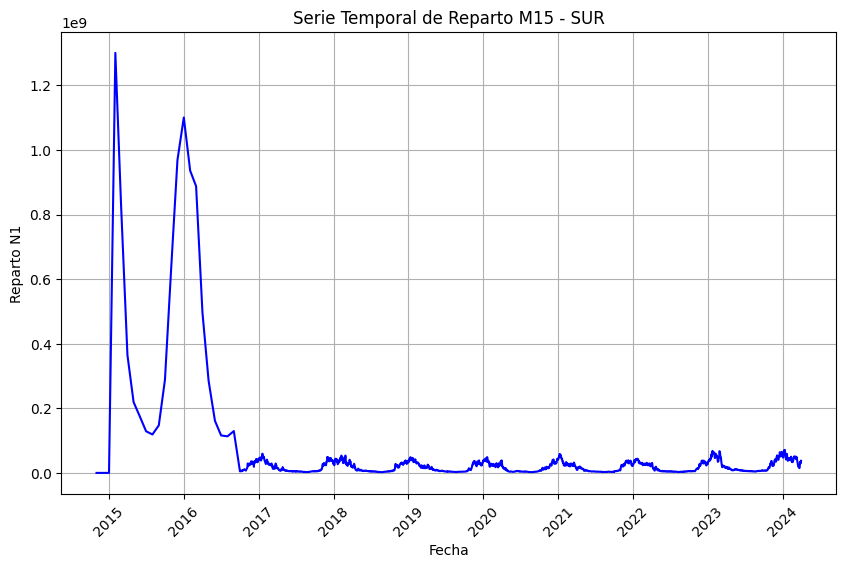

In [34]:
# Crear el gráfico de línea para la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(Emisión_y_Repartos_Reparto_M15_SUR['fecha_gas'], Emisión_y_Repartos_Reparto_M15_SUR['Reparto_M15'], linestyle='-', color='blue')

# Etiquetas y título del gráfico
plt.xlabel('Fecha')
plt.ylabel('Reparto N1')
plt.title('Serie Temporal de Reparto M15 - SUR')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar la cuadrícula para facilitar la lectura
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [35]:
Emisión_y_Repartos_Reparto_M15= Emisión_y_Repartos_reducido[['comer', 'Comercializador','Punto', 'fecha_gas', 'Reparto_M15']].copy()
Emisión_y_Repartos_Reparto_M15_GNC= Emisión_y_Repartos_Reparto_M15[Emisión_y_Repartos_Reparto_M15['Comercializador'] == 'GNC']
Emisión_y_Repartos_Reparto_M15_GNC['fecha_gas'] = pd.to_datetime(Emisión_y_Repartos_Reparto_M15_GNC['fecha_gas'], format='%d/%m/%Y')
Emisión_y_Repartos_Reparto_M15_GNC= Emisión_y_Repartos_Reparto_M15_GNC.groupby('fecha_gas')['Reparto_M15'].sum().reset_index()
Emisión_y_Repartos_Reparto_M15_GNC= Emisión_y_Repartos_Reparto_M15_GNC.sort_values(by='fecha_gas')
Emisión_y_Repartos_Reparto_M15_GNC= Emisión_y_Repartos_Reparto_M15_GNC[Emisión_y_Repartos_Reparto_M15_GNC['Reparto_M15'] != 0]
Emisión_y_Repartos_Reparto_M15_GNC.head(3)

,fecha_gas,Reparto_M15
